<a href="https://colab.research.google.com/github/HafizAQ/ML_Practices/blob/main/AnomalyDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Courtesy Reference: https://python.plainenglish.io/anomaly-detection-end-to-end-real-life-bank-card-fraud-detection-with-xgboost-2a343f761fa9

# Anomaly Detection
#### Bank Card Fraud Detection with XGBoost

=> Data Analysis: Outline Detection, PCA, Statistical Insights (Correlation, Skewness, Kurtosis..), Preprocessing, Data Augmentation(SMOTE), Grid Search, Cross-validation, Training, Evaluation..

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the dataset

df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29794,35633,0.786689,-0.691214,-0.329291,0.149435,0.714779,1.949061,-0.136906,0.474172,0.206173,...,-0.165285,-0.793473,-0.030110,-2.358519,-0.096468,0.332321,-0.001435,0.025559,200.00,0.0
29795,35633,0.800996,-2.159993,0.008378,-1.081828,-1.768799,-0.445016,-0.571165,-0.162429,-1.785636,...,0.016930,-0.350492,-0.234889,0.062628,0.163018,-0.212022,-0.024151,0.077021,363.00,0.0
29796,35633,1.115726,-0.472602,0.983034,0.294673,-1.218768,-0.341755,-0.667340,0.171155,0.805427,...,0.104463,0.366801,-0.073219,0.623597,0.247275,1.121835,-0.060566,0.003541,36.92,0.0
29797,35634,1.239103,-1.000617,0.843324,-0.560021,-1.400343,-0.151696,-1.026058,-0.001637,-0.131138,...,0.325954,0.855203,-0.245683,-0.072671,0.512799,-0.023495,0.036574,0.035202,91.00,0.0


#Exploratory Data Analysis

In [3]:
#1) Basic EDA
print("Summary Statistics of the Dataset:")
df.describe()
print(df.columns)

Summary Statistics of the Dataset:
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


Class 0: 29704
Class 1: 94


<ipython-input-4-db95508e2ea0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='pastel')


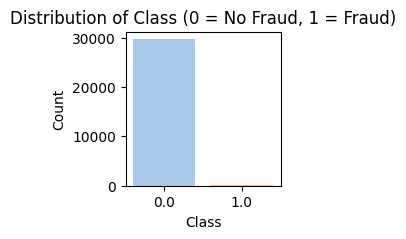

In [4]:
#2) Check Class Distribution
# check the distribution of the target variable "Class"
class_counts = df["Class"].value_counts()
for c, count in enumerate(class_counts):
    print("Class " + str(c) + ": " + str(count))
# visualize class distribution
plt.figure(figsize=(2, 2))
sns.countplot(x='Class', data=df, palette='pastel')
plt.title('Distribution of Class (0 = No Fraud, 1 = Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

#Insights
- **Class Imbalance**: Class 0 (no fraud), Class 1 (fraud), indicating sever imbalance

- Imbalance Ratio: Understanding this balance is critical, as it may bias the model toward predicting non-fraud more often

- Implication for Modeling: Imbalance will require handling methods like SMOTE (Synthetic Minority Over-sampling Technique) or using specialized metrics such as Precision, Recall, and F1-score for evaluation rather than accuracy alone.

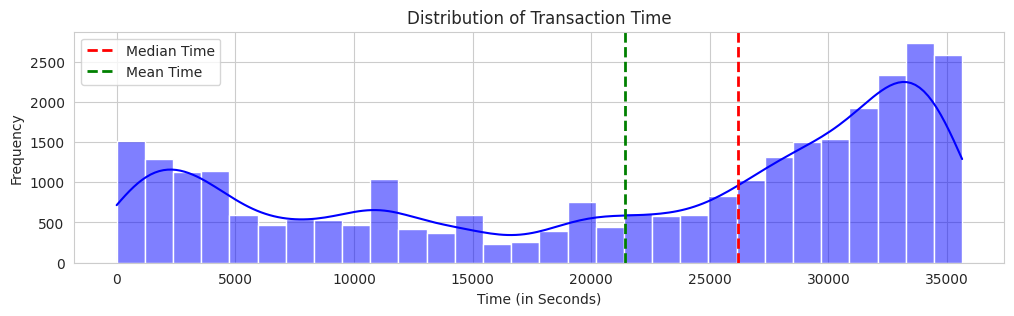

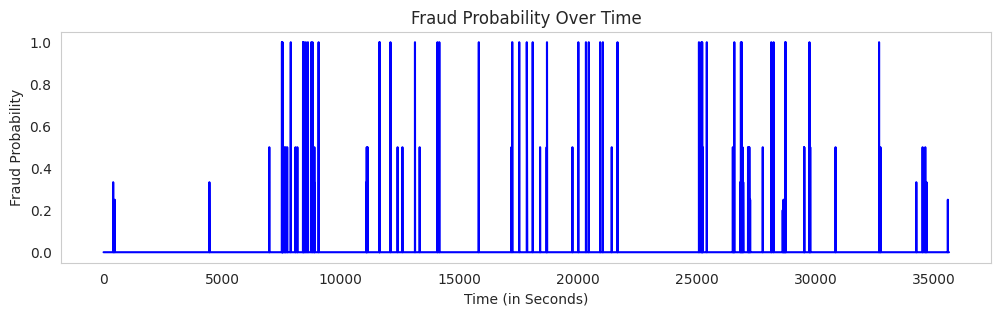

In [5]:
#3) Time Feature Analysis

# Histogram
# set the style
sns.set_style('whitegrid')
# create a histogram
plt.figure(figsize=(12, 3))
sns.histplot(df['Time'], bins=30, kde=True, color='blue')
plt.title('Distribution of Transaction Time')
plt.xlabel("Time (in Seconds)")
plt.ylabel("Frequency")
plt.axvline(x = df['Time'].median(), color='red', linestyle='dashed', linewidth=2, label='Median Time')
plt.axvline(x = df['Time'].mean(), color='green', linestyle='dashed', linewidth=2, label='Mean Time')
plt.legend()
plt.show()
# LinePlot
# create a line plot to analyze fraud over time
plt.figure(figsize=(12, 3))
time_fruad = df.groupby('Time')['Class'].mean().reset_index()
plt.plot(time_fruad['Time'], time_fruad['Class'], color='blue')
plt.title('Fraud Probability Over Time')
plt.xlabel("Time (in Seconds)")
plt.ylabel("Fraud Probability")
plt.grid()
plt.show()

#Insights:
- Time Distribution:Histogram -> how transactions are distributed over time: identify periods of high activity or inactivity

- Trends in Fraud: Line plot illustertes certain times correlate with higher fraud probabilities (high risk of fraud might evaluated)




<ipython-input-6-693905fcce15>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hour_fraud, x='Hour', y='Class', palette='viridis')


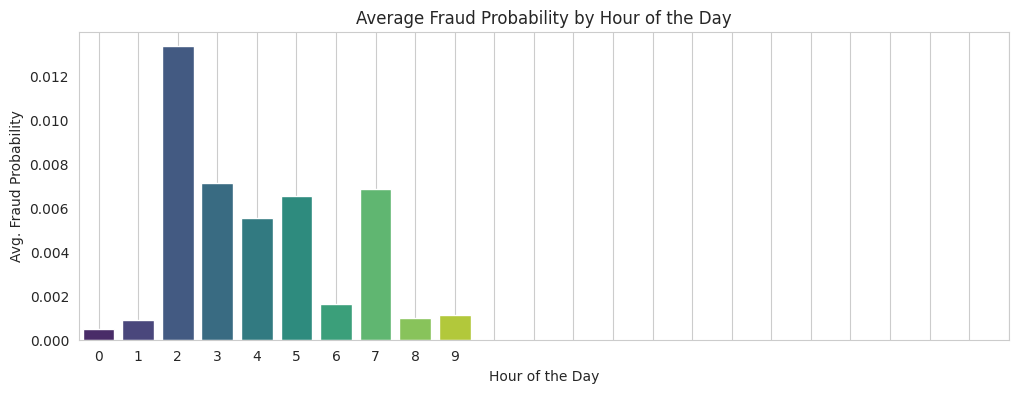

In [6]:
# 4) Times of day Correlate with a high Likelihood of Fraud


# convert 'Time' from seconds to hours for better analysis
df['Hour'] = (df['Time'] //  3600) % 24

# caluclate the mean fraud probability by hour
hour_fraud = df.groupby('Hour')['Class'].mean().reset_index()

# plotting the average fruad probability by hour
plt.figure(figsize=(12, 4))
sns.barplot(data=hour_fraud, x='Hour', y='Class', palette='viridis')
plt.title('Average Fraud Probability by Hour of the Day')
plt.xlabel("Hour of the Day")
plt.ylabel("Avg. Fraud Probability")
plt.xticks(range(0, 24))
plt.grid()
plt.show()

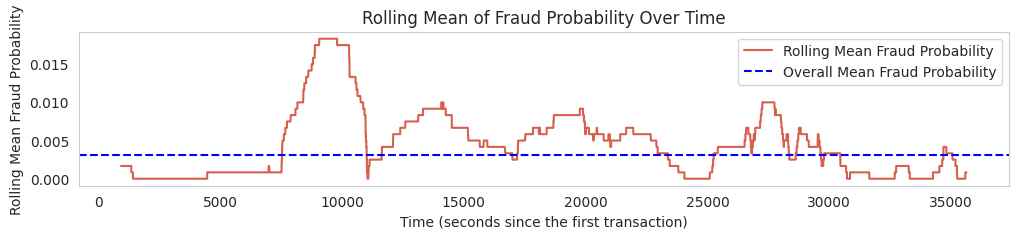

In [7]:
#5) Analyze Unusual Spikes in Fraud

# create a rolling mean to identify spikes in fraud
df['Fraud_Spike'] = df['Class'].rolling(window=1200).mean()  # Window size can be adjusted
# Plotting the rolling mean of fraud over time
plt.figure(figsize=(12, 2))
plt.plot(df['Time'], df['Fraud_Spike'], color='#d6604d', label='Rolling Mean Fraud Probability')
plt.title('Rolling Mean of Fraud Probability Over Time')
plt.xlabel('Time (seconds since the first transaction)')
plt.ylabel('Rolling Mean Fraud Probability')
plt.axhline(y=df['Class'].mean(), color='blue', linestyle='--', label='Overall Mean Fraud Probability')
plt.legend()
plt.grid()
plt.show()

#Insights

- Time of Day Correlation: Bar plot, hours are more likely to have fraudlent activity, identification of peak risk times

- Unusual Spikes: Rolling Mean Plot, idicate periods with significant increases in fraud activity, prompting further investigation

<ipython-input-8-dbd3db0d9e9f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=df, palette=['blue', 'orange'])


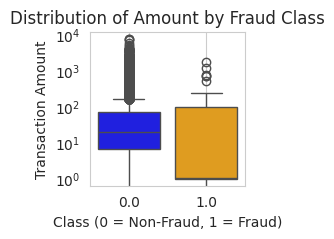

<ipython-input-8-dbd3db0d9e9f>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_counts = df.groupby('Amount Range')['Class'].value_counts(normalize=True).unstack().fillna(0)


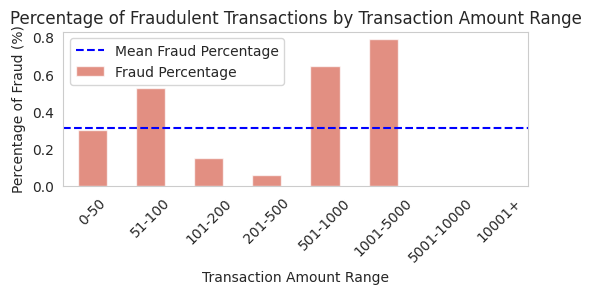

Mean and Median Transactions Amounts:
   Class      mean  median
0    0.0  79.57003   20.00
1    1.0  95.59000    1.05


In [8]:
#6) Amound Distribution

# create a boxplot to visualize the amount of distribution based on fraud classification
plt.figure(figsize=(2, 2))
sns.boxplot(x='Class', y='Amount', data=df, palette=['blue', 'orange'])
plt.title('Distribution of Amount by Fraud Class')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Transaction Amount')
plt.yscale('log')  # Use log scale for better visualization of outliers
plt.grid()
plt.show()

# calculate the percentage of fraudulent transactions in different ranges
bins = [0, 50, 100, 200, 500, 1000, 5000, 10000, 50000]
labels = ['0-50', '51-100', '101-200', '201-500', '501-1000', '1001-5000', '5001-10000', '10001+']
df['Amount Range'] = pd.cut(df['Amount'], bins=bins, labels=labels, right=False)

# calculate the counts of fraud in each amount range
fraud_counts = df.groupby('Amount Range')['Class'].value_counts(normalize=True).unstack().fillna(0)
fraud_counts.columns = ['Non-Fraud', 'Fraud']
fraud_counts =  fraud_counts * 100

# plotting the percentage of fraudulent transactions in each amount range
plt.figure(figsize=(6, 2))
fraud_counts['Fraud'].plot(kind='bar', color='#d6604d', alpha=0.7, label='Fraud Percentage')
plt.title('Percentage of Fraudulent Transactions by Transaction Amount Range')
plt.xlabel('Transaction Amount Range')
plt.ylabel('Percentage of Fraud (%)')
plt.xticks(rotation=45)
plt.grid()
plt.axhline(y=fraud_counts['Fraud'].mean(), color='blue', linestyle='--', label='Mean Fraud Percentage')
plt.legend()
plt.show()
# calculate the mean and median transaction amount for fraud and non-fraud transactions
mean_amounts = df.groupby('Class')['Amount'].agg(['mean', 'median']).reset_index()
print("Mean and Median Transactions Amounts:")
print(mean_amounts)


#Insights

- Comparison of Transaction Amounts: Bocplot visualize to compare the median and interquartile range (IQR) of transaction amounts for fraudulent and non-fraudulent transactions

- Transaction Amount Frequency: histogram insights into how frequenctly different transaction amount occur (certain amounts are more commonly associated with Fraud)

- Mean & Median transaction amount: Indicates fraudulent transactions trend to be higher or lower thank non-fraudulent ones

- The bar plot: fraud distribution across different transaction amounts, helping identify specific ranges that are more prone to fraud

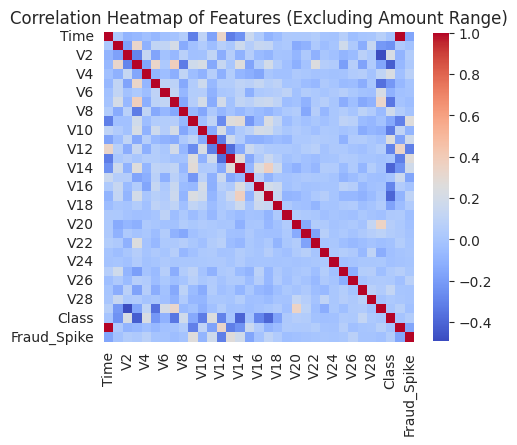

In [9]:
#5) Correlation Analysis

# calculate the correlation matrix
corr_matrix = df.drop(columns=['Amount Range']).corr()
# plot the correlation matrix
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Features (Excluding Amount Range)')
plt.show()

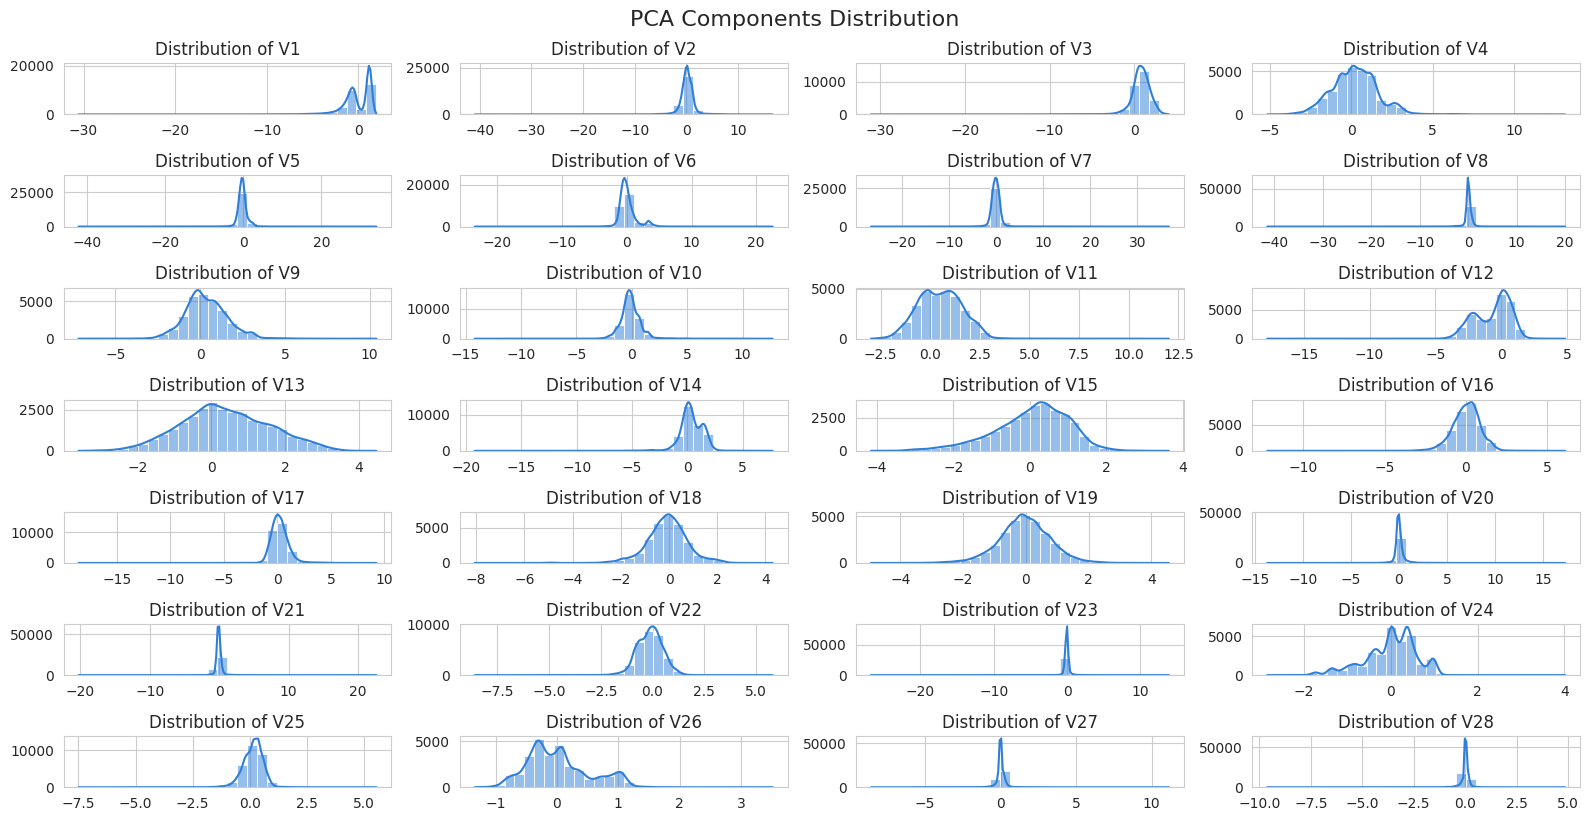

In [10]:
#6) PCA (Principle Component Analysis)

# List of PCA components (V1 to V28)
pca_components = [f'V{i}' for i in range(1, 29)]

# Plotting distributions of PCA components
plt.figure(figsize=(16, 8))
for i, component in enumerate(pca_components, 1):
    plt.subplot(7, 4, i)  # 7 rows and 4 columns for 28 PCA components
    sns.histplot(df[component], kde=True, bins=30, color='#2f7ed8')
    plt.title(f'Distribution of {component}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.suptitle('PCA Components Distribution', y=1.02, fontsize=16)
plt.show()

#PCA Component Analysis Insights

- Component Distributions: distinct distribution patterns encode different transactional aspects

- Identifying Fraud-Prone Components: Some components may have notable differences in distribution for fraud Vs non-fraud transactions

- Feature Importance: These components hint at feature importance when examining their association with fraud.

<ipython-input-13-df0312c569b0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=df, palette=['blue', 'orange'])


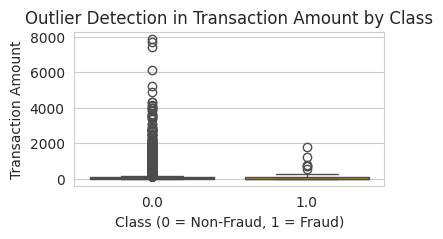

<ipython-input-13-df0312c569b0>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=component, data=df, palette=['blue', 'orange'])
<ipython-input-13-df0312c569b0>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=component, data=df, palette=['blue', 'orange'])
<ipython-input-13-df0312c569b0>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=component, data=df, palette=['blue', 'orange'])
<ipython-input-13-df0312c569b0>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will 

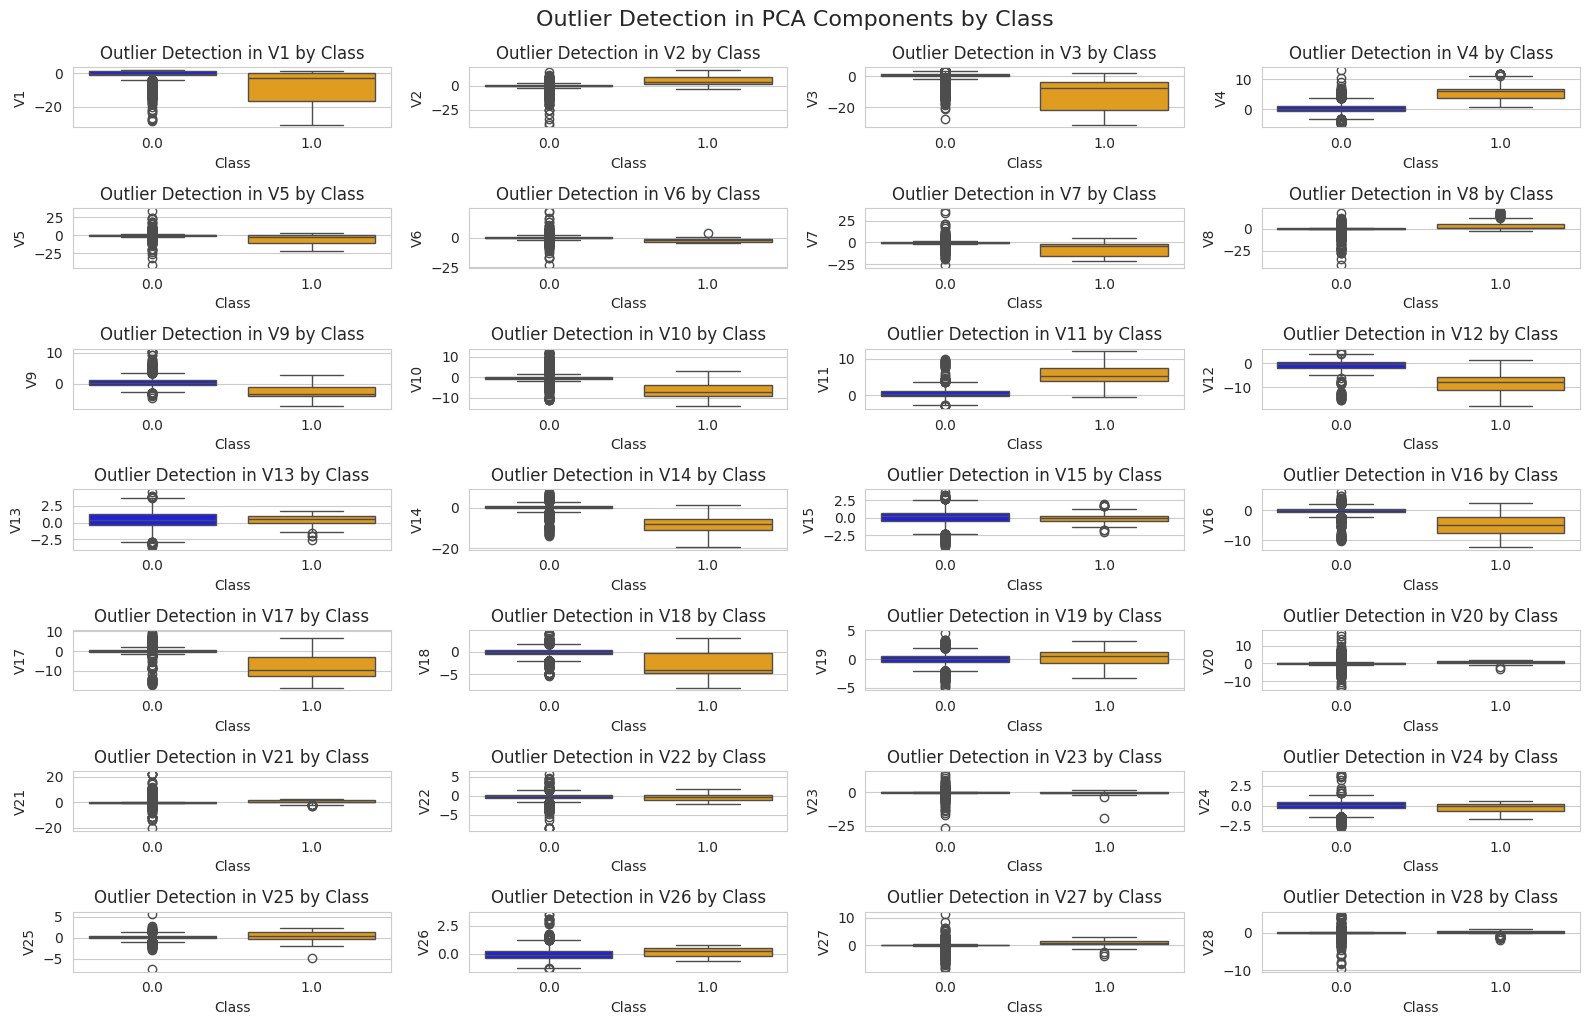

In [13]:
#7) Outlier Detection
# Outlier detection in the 'Amount' feature
plt.figure(figsize=(4, 2))
sns.boxplot(x='Class', y='Amount', data=df, palette=['blue', 'orange'])
plt.title("Outlier Detection in Transaction Amount by Class")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Transaction Amount")
plt.show()

# Outlier detection in PCA components (V1 to V28)
plt.figure(figsize=(16, 10))
for i, component in enumerate(pca_components, 1):
    plt.subplot(7, 4, i)
    sns.boxplot(x='Class', y=component, data=df, palette=['blue', 'orange'])
    plt.title(f"Outlier Detection in {component} by Class")
    plt.xlabel("Class")
    plt.ylabel(component)

plt.tight_layout()
plt.suptitle('Outlier Detection in PCA Components by Class', y=1.02, fontsize=16)
plt.show()

#Outlier Detection Insights

- Fraud Class (Class 1): The PCA components for fraud transitions tend to have a narrower range with fewer extreme outliers in most of the plots. Less vulnerability. Suggests have more specific, consistent patterns in these transformed features.

- Non-Fraud (Class 0): Most components for non-fraud transactions show a large number of outliers, wide ranges, and higher variability. Non-fraud transactions are more diverse in their characteristics. Observations help in detecting fraud by focusing on how certain PCA components behave differently for fraud versus non-fraud transactions


In [15]:
from scipy.stats import skew, kurtosis # Importing the necessary functions from scipy.stats
import seaborn as sns

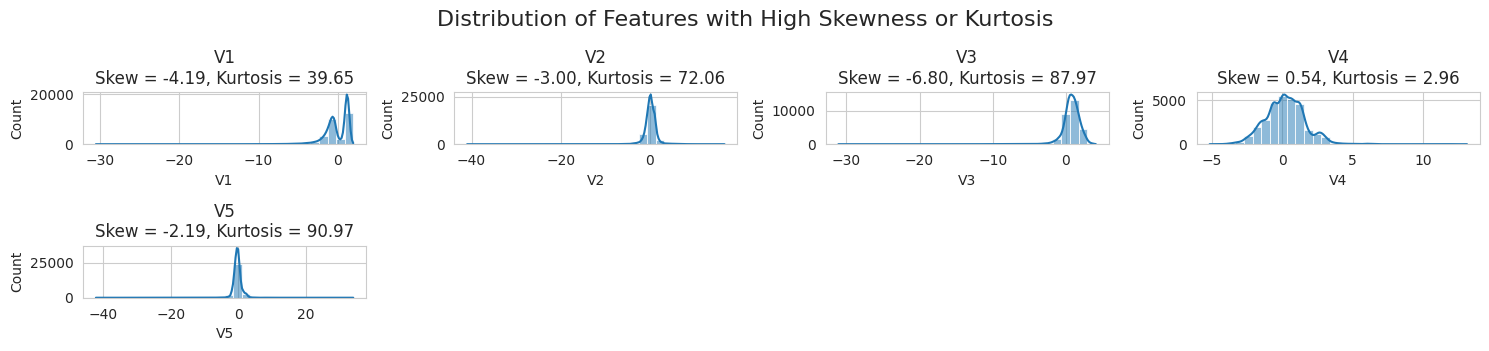

In [16]:
#8) Skewness/ Kurtosis & Distribution

# Calculate skewness and kurtosis for all numerical features
skewness = df.drop(columns=['Class', 'Amount Range']).apply(skew).sort_values(ascending=False)
kurt = df.drop(columns=['Class', 'Amount Range']).apply(kurtosis).sort_values(ascending=False)

# Visualize distribution, skewness, and kurtosis for highly skewed or high-kurtosis features
highly_skewed_or_kurt = skewness[skewness > 0.5].index.union(kurt[kurt > 3].index)

plt.figure(figsize=(15, 12))
for i, feature in enumerate(highly_skewed_or_kurt, 1):
    plt.subplot(8, 4, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f"{feature}\nSkew = {skewness[feature]:.2f}, Kurtosis = {kurt[feature]:.2f}")
    plt.xlabel(feature)

plt.tight_layout()
plt.suptitle('Distribution of Features with High Skewness or Kurtosis', y=1.02, fontsize=16)
plt.show()

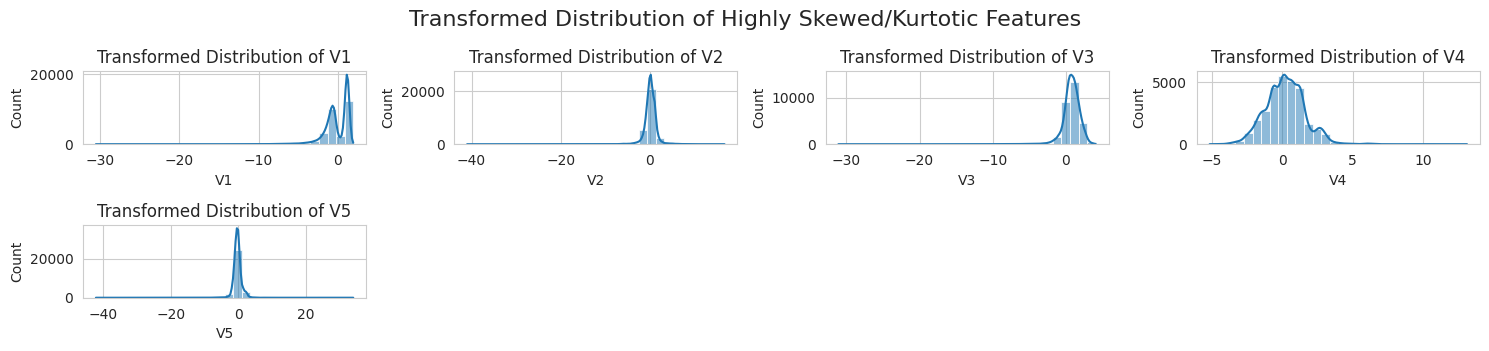

In [17]:
# Apply log transformation to highly skewed features (log doesn't apply to negative values)
df[highly_skewed_or_kurt] = df[highly_skewed_or_kurt].apply(lambda x: np.log1p(x) if x.min() >= 0 else x)

# Visualize transformed distributions
plt.figure(figsize=(15, 12))
for i, feature in enumerate(highly_skewed_or_kurt, 1):
    plt.subplot(8, 4, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f"Transformed Distribution of {feature}")
    plt.xlabel(feature)

plt.tight_layout()
plt.suptitle('Transformed Distribution of Highly Skewed/Kurtotic Features', y=1.02, fontsize=16)
plt.show()

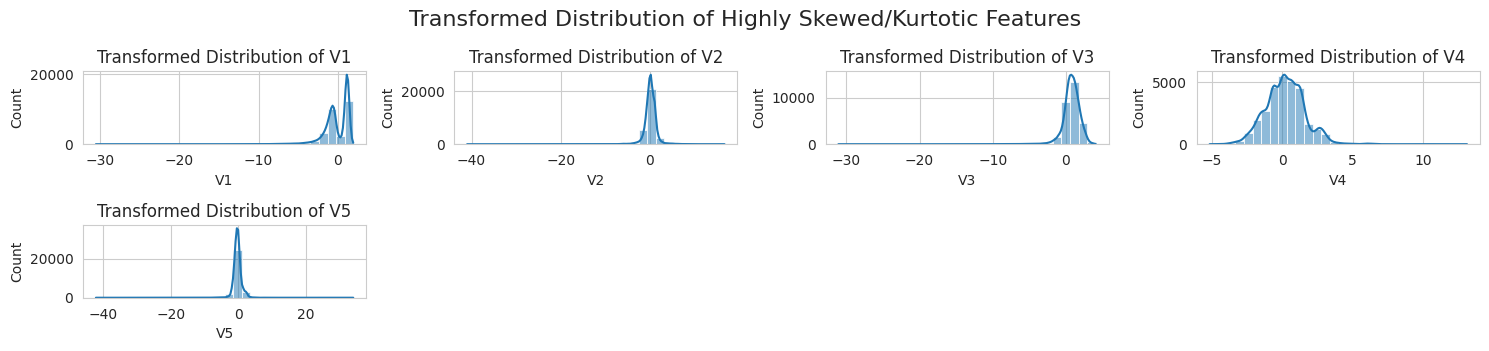

In [18]:
# Apply log transformation to highly skewed features (log doesn't apply to negative values)
df[highly_skewed_or_kurt] = df[highly_skewed_or_kurt].apply(lambda x: np.log1p(x) if x.min() >= 0 else x)

# Visualize transformed distributions
plt.figure(figsize=(15, 12))
for i, feature in enumerate(highly_skewed_or_kurt, 1):
    plt.subplot(8, 4, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f"Transformed Distribution of {feature}")
    plt.xlabel(feature)

plt.tight_layout()
plt.suptitle('Transformed Distribution of Highly Skewed/Kurtotic Features', y=1.02, fontsize=16)
plt.show()

#Skewness & Kurtosis Insights

- Skewed and Kurtotic Features: PCA components display high skewness or kurtosis, suggesting asymmetry and heavy trails

- Extreme Outliers: Features with high kurtosis may contain extreme values, including potential outliers to impact model performance

- Transformations: Log transformations on skewed/ kurtotic features can normalize their distributions, reducing model sensitivity to extreme values

- Enhanced Model Stability: By addressing both skewness and kurtosis, the data becomes more suitable for ML, leading to accuracy and generalizability

<ipython-input-19-91ad6de71979>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Class', y=feature, data=df, palette=['#2f7ed8', '#d6604d'])
<ipython-input-19-91ad6de71979>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Class', y=feature, data=df, palette=['#2f7ed8', '#d6604d'])
<ipython-input-19-91ad6de71979>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Class', y=feature, data=df, palette=['#2f7ed8', '#d6604d'])
<ipython-input-19-91ad6de71979>:10: FutureWarning: 

Passing `palette` without assigning `hue` is depre

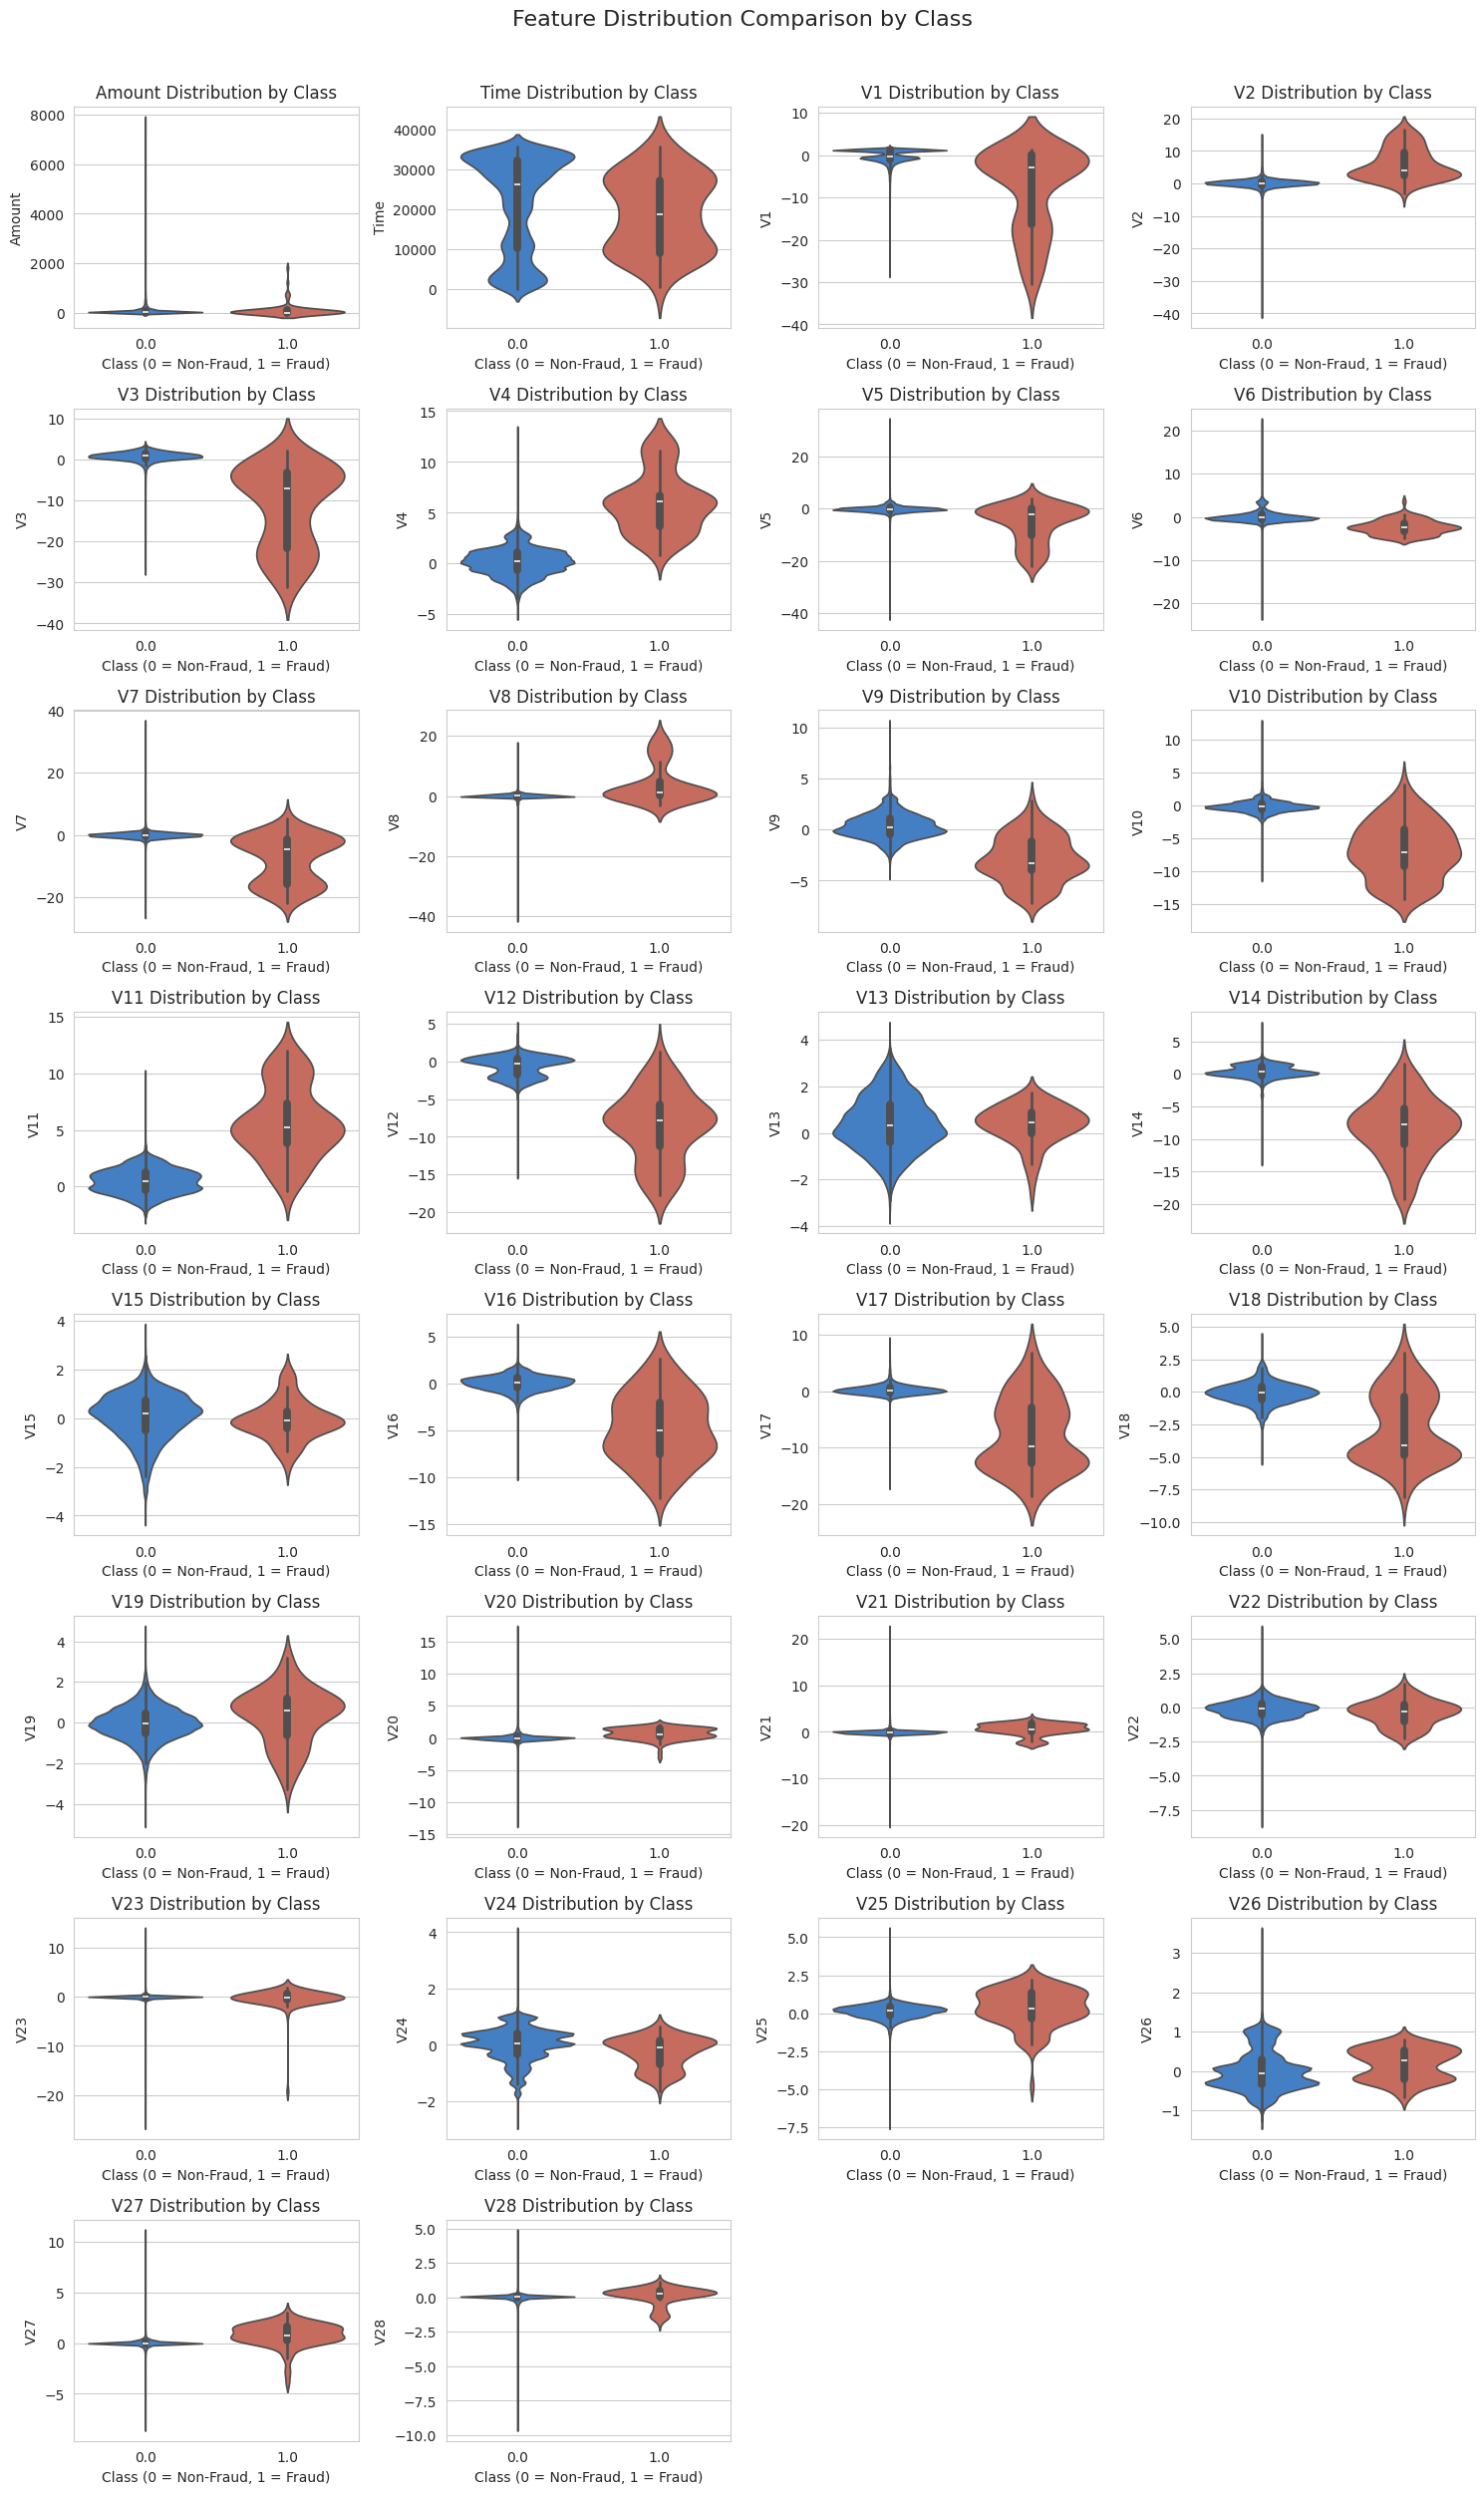

In [19]:
#9) Feature Correlation with Class

# Select features for correlation analysis with the target 'Class' variable
features_to_analyze = ['Amount', 'Time'] + [f'V{i}' for i in range(1, 29)]  # V1 to V28

# Set up plot for feature analysis by class
plt.figure(figsize=(15, 30))
for i, feature in enumerate(features_to_analyze, 1):
    plt.subplot(10, 4, i)
    sns.violinplot(x='Class', y=feature, data=df, palette=['#2f7ed8', '#d6604d'])
    plt.title(f'{feature} Distribution by Class')
    plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
    plt.ylabel(feature)

plt.tight_layout()
plt.suptitle("Feature Distribution Comparison by Class", y=1.02, fontsize=16)
plt.show()


#Insights
- Distinctive Patterns: Several PCA components (V4, V10, etc) display significant differences in probability between fraudulent and non-fraudulent transactions, suggesting predictive power
- Amount Feature: The Amount features show distinct patterns, where a certain amount might be more in fraud cases
- High Correlation: Features with visible separation by class could serve as strong indicators for fraud detection in modelling
- Next Steps: Consider including features with high differentiation in the final model that might contribute significantly to identifying fraud

#II. Data Preprocessing and Clustering

- Scale: Amount, Time, Hour, Fraud_Spike, Amount Range

In [20]:
# Detect outliers using Z-score for 'Amount'
z_scores = np.abs((df['Amount'] - df['Amount'].mean()) / df['Amount'].std())
outliers = np.where(z_scores > 3)[0]  # Set a threshold for outliers (usually z-score > 3)
print(f"Number of Outliers in 'Amount': {len(outliers)}")

Number of Outliers in 'Amount': 443


In [21]:
#i) Data Scaling

from sklearn.preprocessing import RobustScaler

# Create an instance of the LabelEncoder
rob_scaler = RobustScaler()

# Apply Label Encoding to the 'Amount Range' feature
df['Time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1, 1))
df['Amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['Hour'] = rob_scaler.fit_transform(df['Hour'].values.reshape(-1, 1))

# drop the amount range column and fraud spike column that were added for the analyses part
df.drop(['Amount Range'], axis=1, inplace=True)
df.drop(['Fraud_Spike'], axis=1, inplace=True)

In [23]:
#Startified K-fold Cross-Validation
!pip install scikit-learn
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold # Import StratifiedKFold from sklearn.model_selection

In [25]:
#ii) Splitting the Dataset
#Startified K-fold Cross-Validation
X = df.drop('Class', axis=1)
y = df['Class']

# Drop rows with NaN values in the target variable 'Class'
df = df.dropna(subset=['Class'])  # Drop rows with NaN in 'Class' column
X = df.drop('Class', axis=1)  # Update X after dropping NaN rows
y = df['Class']  # Update y after dropping NaN rows


sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# Check the Distribution of the labels

# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

print('Label Distributions in the Dataset :')
print(' No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '%')
print(' Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '%')

print('Label Distributions in Train :')
print(" No Frauds " + str(round(train_counts_label[0]/ len(original_ytrain)*100, 2)) + " %")
print(" Frauds " + str(round(train_counts_label[1]/ len(original_ytrain)*100, 2)) + " %")

print('Label Distributions in Test :')
print(" No Frauds " + str(round(test_counts_label[0]/ len(original_ytest)*100, 2)) + " %")
print(" Frauds " + str(round(test_counts_label[1]/ len(original_ytest)*100, 2)) + " %")

Label Distributions in the Dataset :
 No Frauds 99.68 %
 Frauds 0.32 %
Label Distributions in Train :
 No Frauds 99.69 %
 Frauds 0.31 %
Label Distributions in Test :
 No Frauds 99.68 %
 Frauds 0.32 %


#III. Classification
- **SMOT (Synthetic Minority Over-sampling Technique) Techniques:** To address the problem of **imbalanced datasets** machine learning. Models are biased towards the majority class during training

- 1) Identify Minority Class: SMOTE first identifies the samples belonging to the minority class

- 2) Selection Neighbors: For each sample in the minority class, it finds several of its nearest neighbours within the same class

- 3) Generate Synthetic Samples: Using nearest neighbours, SMOTE then creates new samples by interpolating between the original sample and its neighbours. This means it generates a point lies on the line segment between the original and the neighbour sample, adding more diversity to the minority class



#Randomized SearchCV
- Hyperparameter optimization
- Grid Search CV: Sample all possible combinations of hyperparameters while Randomized SearchCV samples a fixed number of random combinations from the hyperparameter space.
- Help to find the best hyperparameters while reducing computation time, especially when search space is large

#Cross Validation

- Accessing performance & generalizability of a Machine Learning Model
- Involves splitting the dataset into K-folds

In [26]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE

# Lists to append scores and calculate the averages
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Defining hyperparameters for XGBoost with more options
xgb_params = {
    'n_estimators': [50, 100, 200, 300, 500],               # Number of trees in the model
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3],   # Learning rate, affects the speed of learning
    'max_depth': [3, 5, 7, 10, 15],                         # Maximum depth of trees, larger depth = more complexity
    'scale_pos_weight': [1, len(original_ytrain[original_ytrain == 0]) / len(original_ytrain[original_ytrain == 1])],  # Weight for the minority class
    'colsample_bytree': [0.3, 0.5, 0.7, 1],                 # Fraction of columns to sample per tree
    'subsample': [0.5, 0.6, 0.8, 1],                        # Subsampling for each tree
    'min_child_weight': [1, 3, 5, 10],                      # Minimum weight of the sum of observations for a terminal node
    'gamma': [0, 0.1, 0.3, 0.5, 1],                         # Regularization complexity for nodes to avoid overfitting
    'reg_alpha': [0, 0.1, 0.5, 1, 5, 10],                   # L1 regularization (lasso), encourages feature selection
    'reg_lambda': [1, 1.5, 2, 5, 10],                       # L2 regularization (ridge), controls overfitting
    'max_delta_step': [0, 1, 3, 5, 10]                      # For stability when handling imbalanced classes
}

# Creating the RandomizedSearchCV instance
rand_xgb = RandomizedSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    xgb_params,
    n_iter=20,  # Increase the number of iterations for a more exhaustive search
    scoring='f1',  # Optional, to maximize the F1-score, especially useful for imbalanced classes
    cv=5,         # Number of cross-validation folds
    random_state=42
)

# Cross-validating with SMOTE and XGBoost
for train, test in sss.split(original_Xtrain, original_ytrain):
    # SMOTE + XGBoost pipeline
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_xgb)
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_xgb.best_estimator_  # Get the best estimator after RandomizedSearchCV
    prediction = best_est.predict(original_Xtrain[test])  # Make predictions on the test set

    # Append scores
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))

# Display average scores
print('---' * 45)
print("Accuracy: {}".format(np.mean(accuracy_lst)))
print("Precision: {}".format(np.mean(precision_lst)))
print("Recall: {}".format(np.mean(recall_lst)))
print("F1: {}".format(np.mean(f1_lst)))
print("AUC: {}".format(np.mean(auc_lst)))
print('---' * 45)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:52:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:53:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:53:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:53:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:53:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

---------------------------------------------------------------------------------------------------------------------------------------
Accuracy: 0.7523119392684611
Precision: 0.7112903225806452
Recall: 0.8666666666666666
F1: 0.7523119392684611
AUC: 0.9324496809032892
---------------------------------------------------------------------------------------------------------------------------------------


In [27]:
#Application on the original Test set

from sklearn.metrics import classification_report

labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00      5940
       Fraud       1.00      0.21      0.35        19

    accuracy                           1.00      5959
   macro avg       1.00      0.61      0.67      5959
weighted avg       1.00      1.00      1.00      5959



#Source of Dataset from Kaggle directly


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

100%|██████████| 66.0M/66.0M [00:01<00:00, 45.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3
